In [1]:
import tensorflow as tf 
from tensorflow.keras import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
X_test.shape
y_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 1)

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

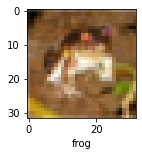

In [6]:
plot_sample(X_train, y_train, 0)

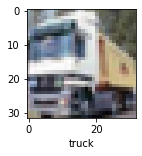

In [7]:
plot_sample(X_train, y_train, 1)

In [8]:

X_train = X_train / 255.0
X_test = X_test / 255.0



In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu', padding="same",input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3),padding="same", activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history=cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 43s 8ms/step - loss: 1.3247 - accuracy: 0.5208
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8893 - accuracy: 0.6873
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6950 - accuracy: 0.7585
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5451 - accuracy: 0.8077
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4216 - accuracy: 0.8536


313/313 - 1s - loss: 0.7739 - accuracy: 0.7468


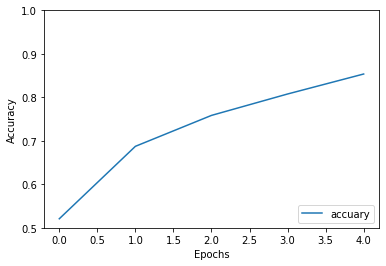

In [12]:
plt.plot(history.history['accuracy'], label='accuary')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_acc = cnn.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.7739 - accuracy: 0.7468


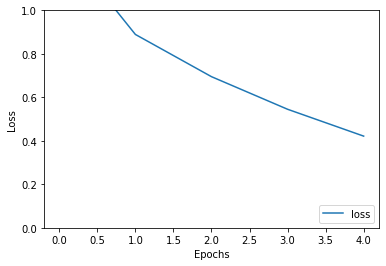

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_acc = cnn.evaluate(X_test, y_test, verbose=2)

In [14]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 20)        560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       23168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [15]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))
y_classes = [np.argmax(element) for element in y_pred]

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.76      0.79      1000
           1       0.92      0.80      0.86      1000
           2       0.71      0.62      0.66      1000
           3       0.54      0.62      0.58      1000
           4       0.75      0.65      0.69      1000
           5       0.59      0.72      0.65      1000
           6       0.87      0.73      0.79      1000
           7       0.77      0.81      0.79      1000
           8       0.83      0.88      0.85      1000
           9       0.78      0.87      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



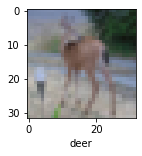

In [16]:
plot_sample(X_test, y_test,100)  

In [17]:
classes[y_classes[100]]

'horse'